# 1. Code : Importing all the necessary Libraries.

In [1]:
# Importing necessary libraries for EDA.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
## If nltk is not present then run this command - pip install nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation


# Importing libraries necessary for Model Building and Training.
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 2. Code : Loading the Data.

In [2]:
data = pd.read_csv('/content/emails.csv')
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
data.shape

(5728, 2)

# 3. Code: Visualize data.

In [4]:
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [5]:
# How many spam emails and normal emails?
freq = data.groupby(['spam'])['spam'].count()
freq

spam
0    4360
1    1368
Name: spam, dtype: int64

<Axes: xlabel='spam', ylabel='count'>

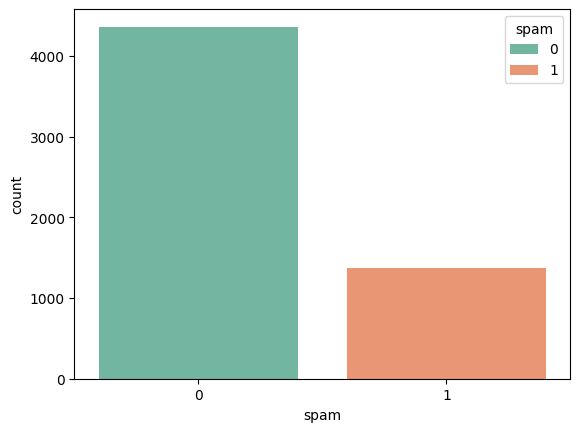

In [7]:
# Use a different colour palette in count plot.
sns.countplot(data = data, x ='spam', hue="spam", stat="count", palette = "Set2")

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_percentage_countplot(data, x, hue):
    total = float(len(data))  # Total number of observations in the data.

    # Draw countplot
    ax = sns.countplot(x=x, hue=hue, data=data, palette = "Set2", stat="count")

    # Calculate percentages and add comments.
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
          ax.text(p.get_x() + p.get_width() / 2.,
                    height / 2 + p.get_y(),
                    '{:.2f}%'.format((height / total) * 100),
                    ha="center",
                    color="white")

    # Show chart.
    plt.show()

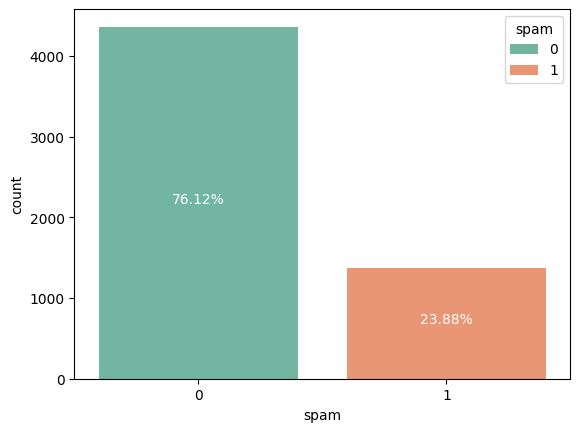

In [9]:
plot_percentage_countplot(data=data, x='spam', hue='spam')

## 4. Code : Imbalance in the data.

- We can clearly see that the number of Ham samples is more than the number of Spam samples, which implies that the data set we are using is imbalanced.

In [10]:
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


## 4.1. Use the Downsampling method.

In [11]:
freq = data.groupby(['spam'])['spam'].count()
freq

spam
0    4360
1    1368
Name: spam, dtype: int64

In [12]:
spam_msg = data[data.spam == 1]
len(spam_msg)

1368

Text(0.5, 0, 'Message types')

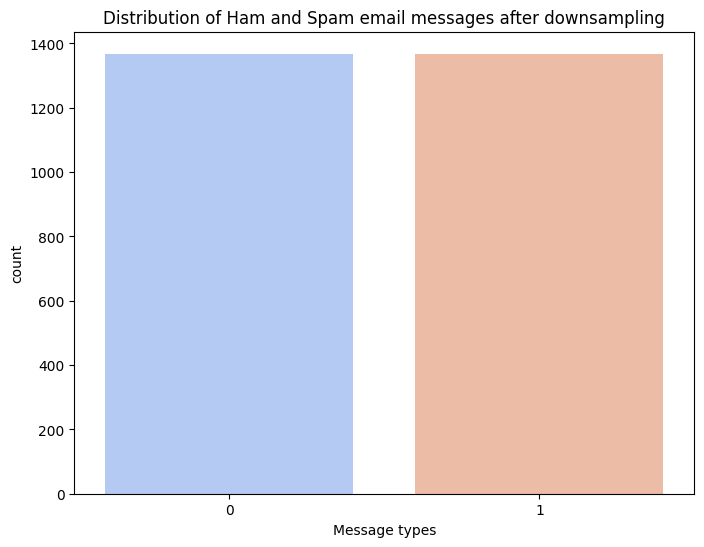

In [18]:
# Downsampling to balance the dataset.
ham_msg = data[data.spam == 0]
spam_msg = data[data.spam == 1]

# Get ham_msg equal to the data number of spam_msg.
ham_msg = ham_msg.sample(n=len(spam_msg),random_state=42)

# Concatenating the downsampled DataFrames.
balanced_data = pd.concat([ham_msg, spam_msg]).reset_index(drop=True)

# Plotting the counts of down sampled dataset.
plt.figure(figsize=(8, 6))
sns.countplot(data=balanced_data, x='spam', palette = "coolwarm")
plt.title('Distribution of Ham and Spam email messages after downsampling')
plt.xlabel('Message types')

In [19]:
ham_msg
# There are 1368 normal messages.

,text,spam
1547,Subject: interview schedule for jinbaek kim i...,0
2730,"Subject: re : wednesday meeting eric , i thi...",0
4843,Subject: re : london research group i ' d do ...,0
2856,"Subject: re : congratulations vince , thanks ...",0
3804,Subject: osman sezgen steve kromer is request...,0
...,...,...
1853,Subject: re : powerisk 2000 followup in re wea...,0
4068,Subject: re : rice / enron finance seminar ser...,0
4054,Subject: steven roeder ( chemical engineer ) ...,0
1626,Subject: vince kaminski expense reports hi li...,0


In [20]:
spam_msg
# And 1368 spam messages.

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [21]:
balanced_data['text'] = balanced_data['text'].str.replace('Subject', '')
balanced_data.info()
# A total of 2736 messages.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2736 non-null   object
 1   spam    2736 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 42.9+ KB


In [22]:
# Remove punctuation.
# Maketrans function to convert.
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

balanced_data['text']= balanced_data['text'].apply(lambda x: remove_punctuations(x))
balanced_data.head()

,text,spam
0,interview schedule for jinbaek kim i didn t...,0
1,re wednesday meeting eric i think we can ...,0
2,re london research group i d do it as soon...,0
3,re congratulations vince thanks for your n...,0
4,osman sezgen steve kromer is requesting that...,0


- Stopwords are words that do not contribute to clarifying the meaning.

In [23]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():
        word = word.lower()

        if word not in stop_words:
            imp_words.append(word)

    output = " ".join(imp_words)

    return output


balanced_data['text'] = balanced_data['text'].apply(lambda text: remove_stopwords(text))
balanced_data.head()

,text,spam
0,interview schedule jinbaek kim see went happy ...,0
1,wednesday meeting eric think skip meeting disc...,0
2,london research group soon possible call exact...,0
3,congratulations vince thanks note congratulati...,0
4,osman sezgen steve kromer requesting osman spe...,0


In [26]:
len(balanced_data['text'])

2736

In [25]:
len(balanced_data['spam'])

2736

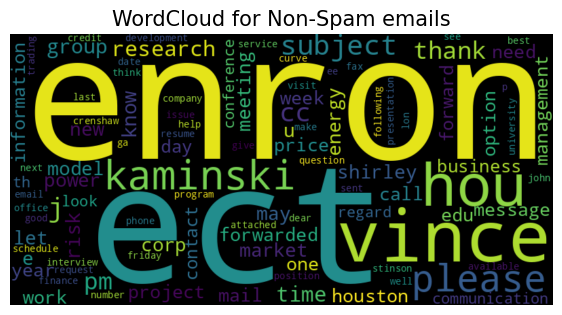

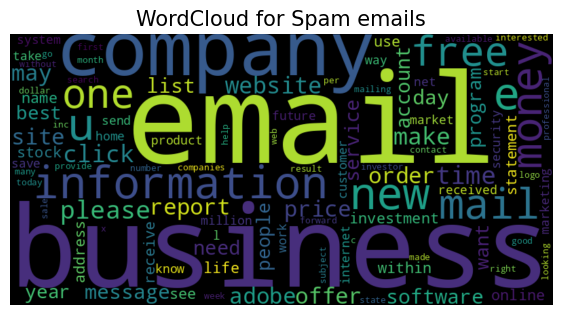

In [27]:
from wordcloud import WordCloud
def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['text'])

    plt.figure(figsize=(7, 7))

    wc = WordCloud(background_color='black',
                   max_words=100, # The maximum word limit in WordCloud representation is 100 words.
                   width=800,
                   height=400,
                   collocations=False).generate(email_corpus) # Do not display paired words.

    plt.imshow(wc, interpolation='bilinear') # Use linear interpolation for display.
    plt.title(f'WordCloud for {typ} emails', fontsize=15)
    plt.axis('off')
    plt.show()

plot_word_cloud(balanced_data[balanced_data['spam'] == 0], typ='Non-Spam')
plot_word_cloud(balanced_data[balanced_data['spam'] == 1], typ='Spam')

## 5. Convert Word2Vec.

- Because machine learning models only understand numbers, not text, we need this conversion step.

In [28]:
balanced_data['text']

0       interview schedule jinbaek kim see went happy ...
1       wednesday meeting eric think skip meeting disc...
2       london research group soon possible call exact...
3       congratulations vince thanks note congratulati...
4       osman sezgen steve kromer requesting osman spe...
                              ...                        
2731    ready get hello viagra 1 med struggle mens ere...
2732    would like 250 gas card let current high price...
2733    immediate reply needed dear sir dr james alabi...
2734    wanna see get fisted fist bang show everything...
2735    hot stock info drgv announces another press re...
Name: text, Length: 2736, dtype: object

# 6. Train test split.

In [29]:
# Input is text mail data.
# Output is 0 and 1 to see whether spam or normal.
train_X, test_X, train_Y, test_Y = train_test_split(balanced_data['text'],
                                                    balanced_data['spam'],
                                                    test_size = 0.2,
                                                    random_state = 42)

#7. What is Padding?
- Pad sequences are adding buffers to the matrix.
- It adds elements to the input matrix before applying any convolution filter and thus it aids in preventing any loss of information, especially from the edges of the image.

In [30]:
# Tokenize the text data.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

# After tokenizing, we convert text to numbers.
train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

# Pad sequences to have the same length.
max_len = 100  # Maximum sequence length.
train_sequences = pad_sequences(train_sequences,
                                maxlen=max_len,
                                padding='post',
                                truncating='post')
test_sequences = pad_sequences(test_sequences,
                               maxlen=max_len,
                               padding='post',
                               truncating='post')

In [31]:
print(train_sequences)

[[ 3366  3953   422 ... 13843   817  4489]
 [  476   931  1851 ...     0     0     0]
 [ 3192  1179  1503 ...    39 13859   133]
 ...
 [   22   243  2137 ...     0     0     0]
 [ 3083    36   405 ...     0     0     0]
 [ 2078  3408   197 ...     0     0     0]]


# 8. Model development and evaluation.

In [32]:
print(tokenizer)

In [33]:
print(len(tokenizer.word_index) + 1)

25157


## 8.1. Build the model.

In [34]:
# Build the model.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1,
                                    output_dim=32,
                                    input_length=max_len))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Print the model summary.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           805024    
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 808737 (3.09 MB)
Trainable params: 808737 (3.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'],
              optimizer = 'adam')

In [36]:
es = EarlyStopping(patience=5,
                   monitor = 'val_accuracy',
                   restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 3,
                       monitor = 'val_loss',
                       factor = 0.5,
                       verbose = 1)

In [38]:
train_sequences

array([[ 3366,  3953,   422, ..., 13843,   817,  4489],
       [  476,   931,  1851, ...,     0,     0,     0],
       [ 3192,  1179,  1503, ...,    39, 13859,   133],
       ...,
       [   22,   243,  2137, ...,     0,     0,     0],
       [ 3083,    36,   405, ...,     0,     0,     0],
       [ 2078,  3408,   197, ...,     0,     0,     0]], dtype=int32)

In [39]:
train_sequences_tensor = tf.convert_to_tensor(train_sequences)

In [40]:
print(type(train_sequences[0]))

<class 'numpy.ndarray'>


In [41]:
train_sequences = np.array(train_sequences, dtype=np.float32)

In [42]:
print(train_sequences_tensor.shape)

(2188, 100)


In [43]:
train_sequences_tensor = tf.convert_to_tensor(train_sequences.tolist())

In [44]:
print(train_sequences_tensor)

tf.Tensor(
[[ 3366.  3953.   422. ... 13843.   817.  4489.]
 [  476.   931.  1851. ...     0.     0.     0.]
 [ 3192.  1179.  1503. ...    39. 13859.   133.]
 ...
 [   22.   243.  2137. ...     0.     0.     0.]
 [ 3083.    36.   405. ...     0.     0.     0.]
 [ 2078.  3408.   197. ...     0.     0.     0.]], shape=(2188, 100), dtype=float32)


In [45]:
print(type(train_sequences_tensor))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [46]:
print(train_Y)

247     0
2488    1
2318    1
347     0
1090    0
       ..
1638    1
1095    0
1130    0
1294    0
860     0
Name: spam, Length: 2188, dtype: int64


In [47]:
print(type(train_Y))

<class 'pandas.core.series.Series'>


In [48]:
# Convert to int.
train_Y = train_Y.astype(int).values

In [49]:
# Convert to int.
test_Y = test_Y.astype(int).values

In [50]:
# Train the model.
history = model.fit(train_sequences_tensor, train_Y,
                    validation_data=(test_sequences, test_Y),
                    epochs=20,
                    batch_size=32,
                    callbacks = [lr, es]
                   )

Epoch 1/20
69/69 [==============================] - 7s 63ms/step - loss: 0.6237 - accuracy: 0.6586 - val_loss: 0.3699 - val_accuracy: 0.9416 - lr: 0.0010
Epoch 2/20
69/69 [==============================] - 5s 68ms/step - loss: 0.2617 - accuracy: 0.9484 - val_loss: 0.1882 - val_accuracy: 0.9580 - lr: 0.0010
Epoch 3/20
69/69 [==============================] - 4s 59ms/step - loss: 0.1197 - accuracy: 0.9739 - val_loss: 0.1353 - val_accuracy: 0.9653 - lr: 0.0010
Epoch 4/20
69/69 [==============================] - 3s 49ms/step - loss: 0.0923 - accuracy: 0.9790 - val_loss: 0.1305 - val_accuracy: 0.9690 - lr: 0.0010
Epoch 5/20
69/69 [==============================] - 4s 53ms/step - loss: 0.0782 - accuracy: 0.9826 - val_loss: 0.1504 - val_accuracy: 0.9635 - lr: 0.0010
Epoch 6/20
69/69 [==============================] - 5s 77ms/step - loss: 0.0703 - accuracy: 0.9845 - val_loss: 0.1564 - val_accuracy: 0.9635 - lr: 0.0010
Epoch 7/20
69/69 [==============================] - ETA: 0s - loss: 0.0510 -

## 8.2. Evaluate model on validation data.

In [51]:
# Evaluate the model.
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)

18/18 [==============================] - 0s 19ms/step - loss: 0.1015 - accuracy: 0.9836
Test Loss : 0.1014852225780487
Test Accuracy : 0.9835766553878784


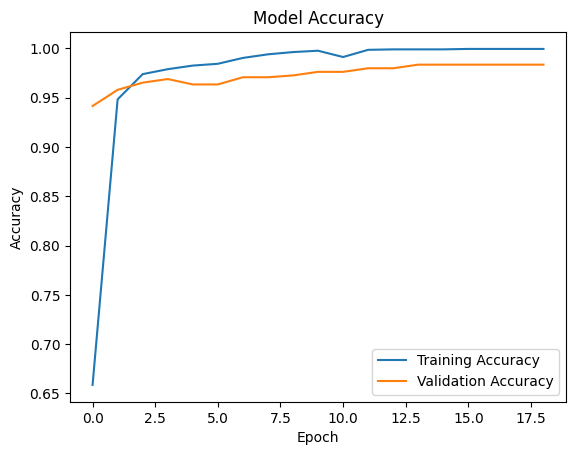

In [52]:
# Model evaluation results.
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()